In [1]:
import requests

In [2]:
r = requests.get('http://www.citibikenyc.com/stations/json')

In [3]:
r.status_code

200

In [4]:
 r.headers['content-type']

'application/json'

In [5]:
r.text

u'{"executionTime":"2016-05-09 10:28:16 PM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":20,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":19,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-05-09 10:26:39 PM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":31,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":1,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2016-05-09 10:27:25 PM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":11,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"av

In [6]:
r.json()

{u'executionTime': u'2016-05-09 10:28:16 PM',
 u'stationBeanList': [{u'altitude': u'',
   u'availableBikes': 19,
   u'availableDocks': 20,
   u'city': u'',
   u'id': 72,
   u'landMark': u'',
   u'lastCommunicationTime': u'2016-05-09 10:26:39 PM',
   u'latitude': 40.76727216,
   u'location': u'',
   u'longitude': -73.99392888,
   u'postalCode': u'',
   u'stAddress1': u'W 52 St & 11 Ave',
   u'stAddress2': u'',
   u'stationName': u'W 52 St & 11 Ave',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'totalDocks': 39},
  {u'altitude': u'',
   u'availableBikes': 1,
   u'availableDocks': 31,
   u'city': u'',
   u'id': 79,
   u'landMark': u'',
   u'lastCommunicationTime': u'2016-05-09 10:27:25 PM',
   u'latitude': 40.71911552,
   u'location': u'',
   u'longitude': -74.00666661,
   u'postalCode': u'',
   u'stAddress1': u'Franklin St & W Broadway',
   u'stAddress2': u'',
   u'stationName': u'Franklin St & W Broadway',
   u'statusKey': 1,
   u'statusValue': u'I

In [7]:
r.json().keys()

[u'executionTime', u'stationBeanList']

In [8]:
r.json()['executionTime']

u'2016-05-09 10:28:16 PM'

In [27]:
r.json()['stationBeanList']

[{u'altitude': u'',
  u'availableBikes': 19,
  u'availableDocks': 20,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-09 10:26:39 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 1,
  u'availableDocks': 31,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-09 10:27:25 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 

In [14]:
len(r.json()['stationBeanList'])

506

In [15]:
key_list = [] #unique list of keys for each station listing
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)

In [31]:
print(key_list)

[u'availableDocks', u'totalDocks', u'city', u'altitude', u'stAddress2', u'longitude', u'lastCommunicationTime', u'postalCode', u'statusValue', u'testStation', u'stAddress1', u'stationName', u'landMark', u'latitude', u'statusKey', u'availableBikes', u'id', u'location']


In [17]:
from pandas.io.json import json_normalize

df = json_normalize(r.json()['stationBeanList'])

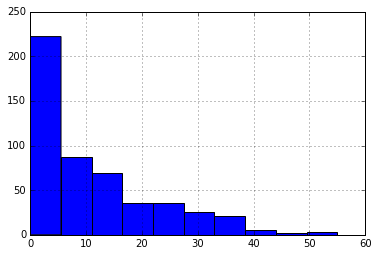

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df['availableBikes'].hist()
plt.show()

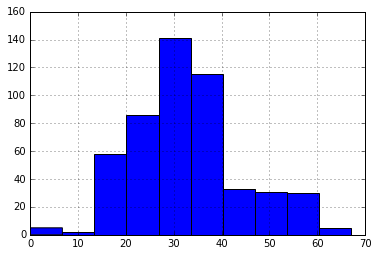

In [20]:
df['totalDocks'].hist()
plt.show()

In [32]:
df['totalDocks'].mean()

32.61067193675889

In [33]:
print(df['stationName'])

0                     W 52 St & 11 Ave
1             Franklin St & W Broadway
2               St James Pl & Pearl St
3        Atlantic Ave & Fort Greene Pl
4                      W 17 St & 8 Ave
5             Park Ave & St Edwards St
6          Lexington Ave & Classon Ave
7                Barrow St & Hudson St
8             MacDougal St & Prince St
9                E 56 St & Madison Ave
10           Clinton St & Joralemon St
11                 Nassau St & Navy St
12                Hudson St & Reade St
13            Greenwich St & Warren St
14                   E 2 St & Avenue C
15            Cleveland Pl & Spring St
16               Warren St & Church St
17                     E 40 St & 5 Ave
18             Henry St & Atlantic Ave
19               LaGuardia Pl & W 3 St
20                     E 47 St & 2 Ave
21                     E 39 St & 3 Ave
22                     W 18 St & 6 Ave
23                  Broadway & W 49 St
24                     E 25 St & 1 Ave
25               Liberty 

In [34]:
condition = (df['statusValue'] == 'In Service')
df[condition]['totalDocks'].mean()

32.98995983935743

In [35]:
df['totalDocks'].median()
df[df['statusValue'] == 'In Service']['totalDocks'].median()

31.0

In [36]:
import sqlite3 as lite

con = lite.connect('citi_bike.db')
cur = con.cursor()

with con:
    cur.execute('CREATE TABLE citibike_reference (id INT PRIMARY KEY, totalDocks INT, city TEXT, altitude INT, stAddress2 TEXT, longitude NUMERIC, postalCode TEXT, testStation TEXT, stAddress1 TEXT, stationName TEXT, landMark TEXT, latitude NUMERIC, location TEXT )')

In [37]:
#a prepared SQL statement we're going to execute over and over again
sql = "INSERT INTO citibike_reference (id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)"

#for loop to populate values in the database
with con:
    for station in r.json()['stationBeanList']:
        #id, totalDocks, city, altitude, stAddress2, longitude, postalCode, testStation, stAddress1, stationName, landMark, latitude, location)
        cur.execute(sql,(station['id'],station['totalDocks'],station['city'],station['altitude'],station['stAddress2'],station['longitude'],station['postalCode'],station['testStation'],station['stAddress1'],station['stationName'],station['landMark'],station['latitude'],station['location']))

In [38]:
#extract the column from the DataFrame and put them into a list
station_ids = df['id'].tolist() 

#add the '_' to the station name and also add the data type for SQLite
station_ids = ['_' + str(x) + ' INT' for x in station_ids]

#create the table
#in this case, we're concatenating the string and joining all the station ids (now with '_' and 'INT' added)
with con:
    cur.execute("CREATE TABLE available_bikes ( execution_time INT, " +  ", ".join(station_ids) + ");")

In [40]:
# a package with datetime objects
import time

# a package for parsing a string into a Python datetime object
from dateutil.parser import parse 

import collections


#take the string and parse it into a Python datetime object
exec_time = parse(r.json()['executionTime'])

In [44]:
with con:
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%Y-%m-%dT%H:%M:%S'),))

In [61]:
id_bikes = collections.defaultdict(int) #defaultdict to store available bikes by station

#loop through the stations in the station list
for station in r.json()['stationBeanList']:
    id_bikes[station['id']] = station['availableBikes']

#iterate through the defaultdict to update the values in the database
with con:
    for k, v in id_bikes.iteritems():
        cur.execute("UPDATE available_bikes SET _" + str(k) + " = " + str(v) + " WHERE execution_time = " + str((exec_time - datetime.datetime(1970,1,1)).total_seconds()) + ";")